# Smartphone Price Prediction Analysis

## Introduction
This Jupyter Notebook serves as a comprehensive analysis for predicting smartphone prices. It encompasses data preprocessing, exploratory data analysis, feature engineering, and predictive modeling.

## 1. Data Preparation

### Importing Packages
We start by importing necessary packages for data manipulation and visualization such as NumPy, Pandas, Seaborn, and Matplotlib.


In [1]:
# Import packages for data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Datasets
Two datasets, train_original and test_original, are loaded using Pandas read_csv() function.

In [2]:
# Import datasets
test_original = pd.read_csv('test - test.csv')
train_original = pd.read_csv('train - train.csv')

### Data Overview
We provide a quick glimpse into the datasets using head() and info() functions.

In [3]:
train_original.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [4]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
test_original.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [6]:
test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [7]:
train_original.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
test_original.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


### It appears most columns in the test and train data likely have consistent data types based on the statistics provided 

No potenitial outliers.

No feature require scaling espcially since we use XGBoost.

## 2. Data Preprocessing
### Handling Missing Values
We drop rows with null values from both the train and test datasets.

Drop rows with null values from train and test dataset

In [9]:
train = train_original.dropna()
test = test_original.dropna()

### Checking Four_G Implications

check if four_g is 1, three_g is always 1 in test data.

Function to check if four_g is 1, three_g is always 1.

In [10]:
def analyze_four_g_implies_three_g(df):
  # Filter the DataFrame where four_g is 1
  four_g_df = df[df['four_g'] == 1]

  # Check if three_g is always 1 when four_g is 1
  three_g_always_one = four_g_df['three_g'].all()

  # Output the result
  if three_g_always_one:
    return "When four_g is 1, three_g is always 1."
  else:
    return "There are instances where four_g is 1 but three_g is not 1."

In [11]:
#check train data if four_g is 1, three_g is always 1.
print(analyze_four_g_implies_three_g(train))

When four_g is 1, three_g is always 1.


In [12]:
#check test data if four_g is 1, three_g is always 1.
print(analyze_four_g_implies_three_g(test_original))

When four_g is 1, three_g is always 1.


For train and test data change (blue, dual_sim, touch_screen, wifi) to boolean

and combine both four_g, three_g columns into 1 column where:

value =4 if four_g=1  

value =3 if four_g=0 and three_g=1

value=0 if four_g=0 and three_g=0

In [13]:
# Combine four_g and three_g columns into one column
def combine_g_values(row):
    if row['four_g'] == 1:
        return 4
    elif row['four_g'] == 0 and row['three_g'] == 1:
        return 3
    else:
        return 2

Modifiy train data

In [14]:
# Map the values for the specified columns to boolean
boolean_columns = ['blue', 'dual_sim', 'touch_screen', 'wifi']
train.loc[:, boolean_columns] = train[boolean_columns].astype(bool)

# Combine four_g and three_g columns into one column
train['combined_g'] = train.apply(combine_g_values, axis=1).copy()

# Drop the original four_g and three_g columns
train = train.drop(['four_g', 'three_g'], axis=1)

<ipython-input-14-df166d86d742>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['combined_g'] = train.apply(combine_g_values, axis=1).copy()


Modifiy test data

In [15]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,price_range,combined_g
0,842,False,2.2,False,1.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,False,True,1,2
1,1021,True,0.5,True,0.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,True,False,2,4
2,563,True,0.5,True,2.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9,True,False,2,4
3,615,True,2.5,False,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11,False,False,2,3
4,1821,True,1.2,False,13.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15,True,False,1,4


In [16]:
# Map the values for the specified columns to boolean
boolean_columns = ['blue', 'dual_sim', 'touch_screen', 'wifi']
test.loc[:, boolean_columns] = test[boolean_columns].astype(bool)

# Combine four_g and three_g columns into one column
test['combined_g'] = test.apply(combine_g_values, axis=1).copy()

# Drop the original four_g and three_g columns
test = test.drop(['four_g', 'three_g'], axis=1)

In [17]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,combined_g
0,1,1043,True,1.8,True,14,5,0.1,193,3,16,226,1412,3476,12,7,2,True,False,2
1,2,841,True,0.5,True,4,61,0.8,191,5,12,746,857,3895,6,0,7,False,False,4
2,3,1807,True,2.8,False,1,27,0.9,186,3,4,1270,1366,2396,17,10,10,True,True,2
3,4,1546,False,0.5,True,18,25,0.5,96,8,20,295,1752,3893,10,0,7,True,False,4
4,5,1434,False,1.4,False,11,49,0.5,108,6,18,749,810,1773,15,8,7,False,True,4


## 3. Feature Engineering
### Combining G Values
We combine four_g and three_g columns into one column based on certain conditions.

Create 2 new columns

Screen size: Combine sc_h and sc_w to create a new feature representing the diagonal screen size.

Pixel density: Calculate the pixel density by dividing px_height * px_width by the screen size.

In [18]:
# Calculate diagonal screen size
train['screen_size'] = np.sqrt(train['sc_h']**2 + train['sc_w']**2).round(1)

# Calculate pixel density
train['pixel_density'] = ((train['px_height'] * train['px_width']) / train['screen_size']).round(1)

# Drop the old columns
train.drop(['sc_h', 'sc_w', 'px_height', 'px_width'], axis=1, inplace=True)

In [19]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,price_range,combined_g,screen_size,pixel_density
0,842,False,2.2,False,1.0,7.0,0.6,188.0,2.0,2.0,2549.0,19,False,True,1,2,11.4,1326.3
1,1021,True,0.5,True,0.0,53.0,0.7,136.0,3.0,6.0,2631.0,7,True,False,2,4,17.3,103996.5
2,563,True,0.5,True,2.0,41.0,0.9,145.0,5.0,6.0,2603.0,9,True,False,2,4,11.2,193509.6
3,615,True,2.5,False,0.0,10.0,0.8,131.0,6.0,9.0,2769.0,11,False,False,2,3,17.9,121328.3
4,1821,True,1.2,False,13.0,44.0,0.6,141.0,2.0,14.0,1411.0,15,True,False,1,4,8.2,178548.3


In [20]:
# Calculate diagonal screen size
test['screen_size'] = np.sqrt(test['sc_h']**2 + test['sc_w']**2).round(1)

# Calculate pixel density
test['pixel_density'] = ((test['px_height'] * test['px_width']) / test['screen_size']).round(1)

# Drop the old columns
test.drop(['sc_h', 'sc_w', 'px_height', 'px_width'], axis=1, inplace=True)

In [21]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,combined_g,screen_size,pixel_density
0,1,1043,True,1.8,True,14,5,0.1,193,3,16,3476,2,True,False,2,13.9,22957.7
1,2,841,True,0.5,True,4,61,0.8,191,5,12,3895,7,False,False,4,6.0,106553.7
2,3,1807,True,2.8,False,1,27,0.9,186,3,4,2396,10,True,True,2,19.7,88061.9
3,4,1546,False,0.5,True,18,25,0.5,96,8,20,3893,7,True,False,4,10.0,51684.0
4,5,1434,False,1.4,False,11,49,0.5,108,6,18,1773,7,False,True,4,17.0,35687.6


## 4. Exploratory Data Analysis (EDA)
### Feature Visualization
We visualize certain features against the price range to identify any patterns.

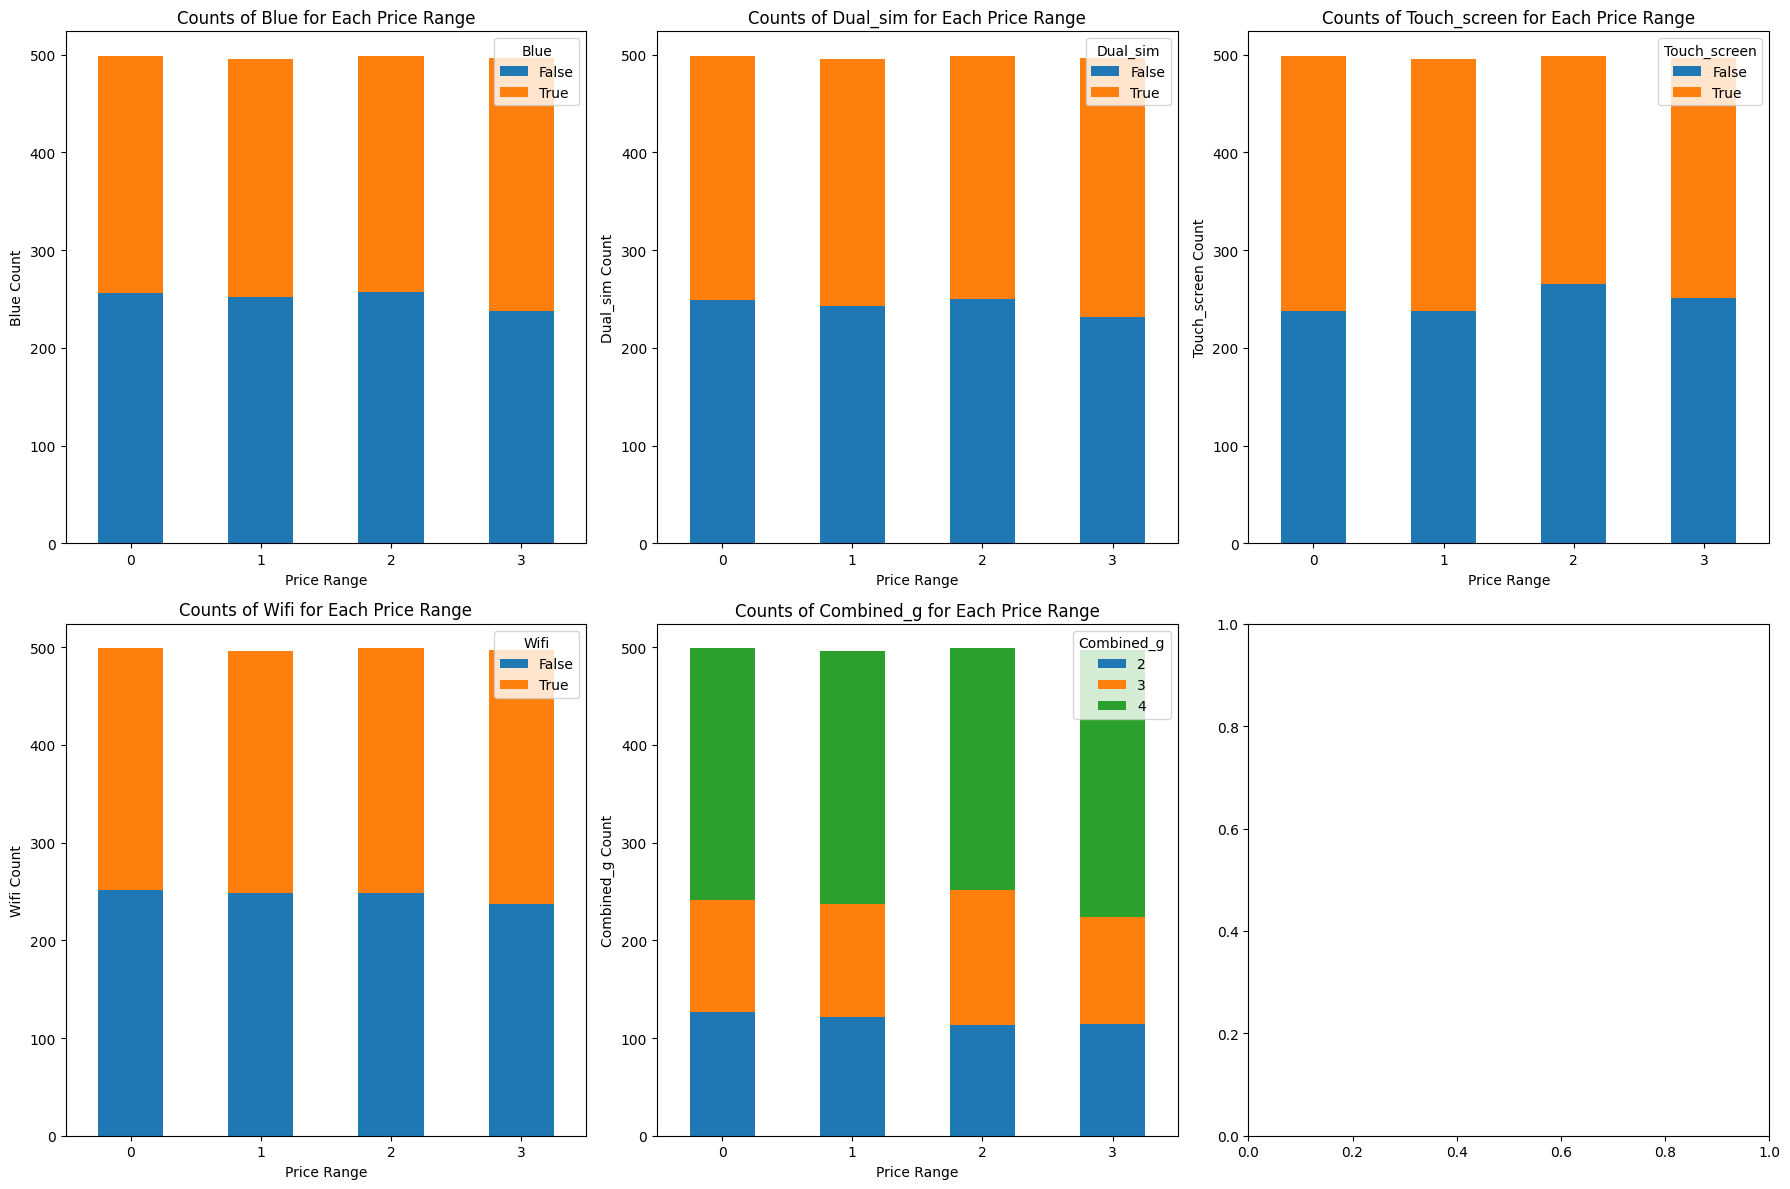

In [32]:
# Features to plot
features = ['blue', 'dual_sim', 'touch_screen', 'wifi', 'combined_g']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Iterate through each feature
for idx, feature in enumerate(features[:5]):  # Limit loop to first 5 features
    if idx < 5:
        # Aggregate counts of feature for each price range
        price_feature_counts = train.groupby('price_range')[feature].value_counts().unstack()
        
        # Plotting
        ax = axes[idx // 3, idx % 3]
        price_feature_counts.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(f'Counts of {feature.capitalize()} for Each Price Range')
        ax.set_xlabel('Price Range')
        ax.set_ylabel(f'{feature.capitalize()} Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        ax.legend(title=feature.capitalize())
    else:
        # Remove axis for the empty subplot
        axes.flatten()[idx].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


## 5. Further Analysis
### Feature Correlation
We further explore correlations between features and the price range using scatter plots.

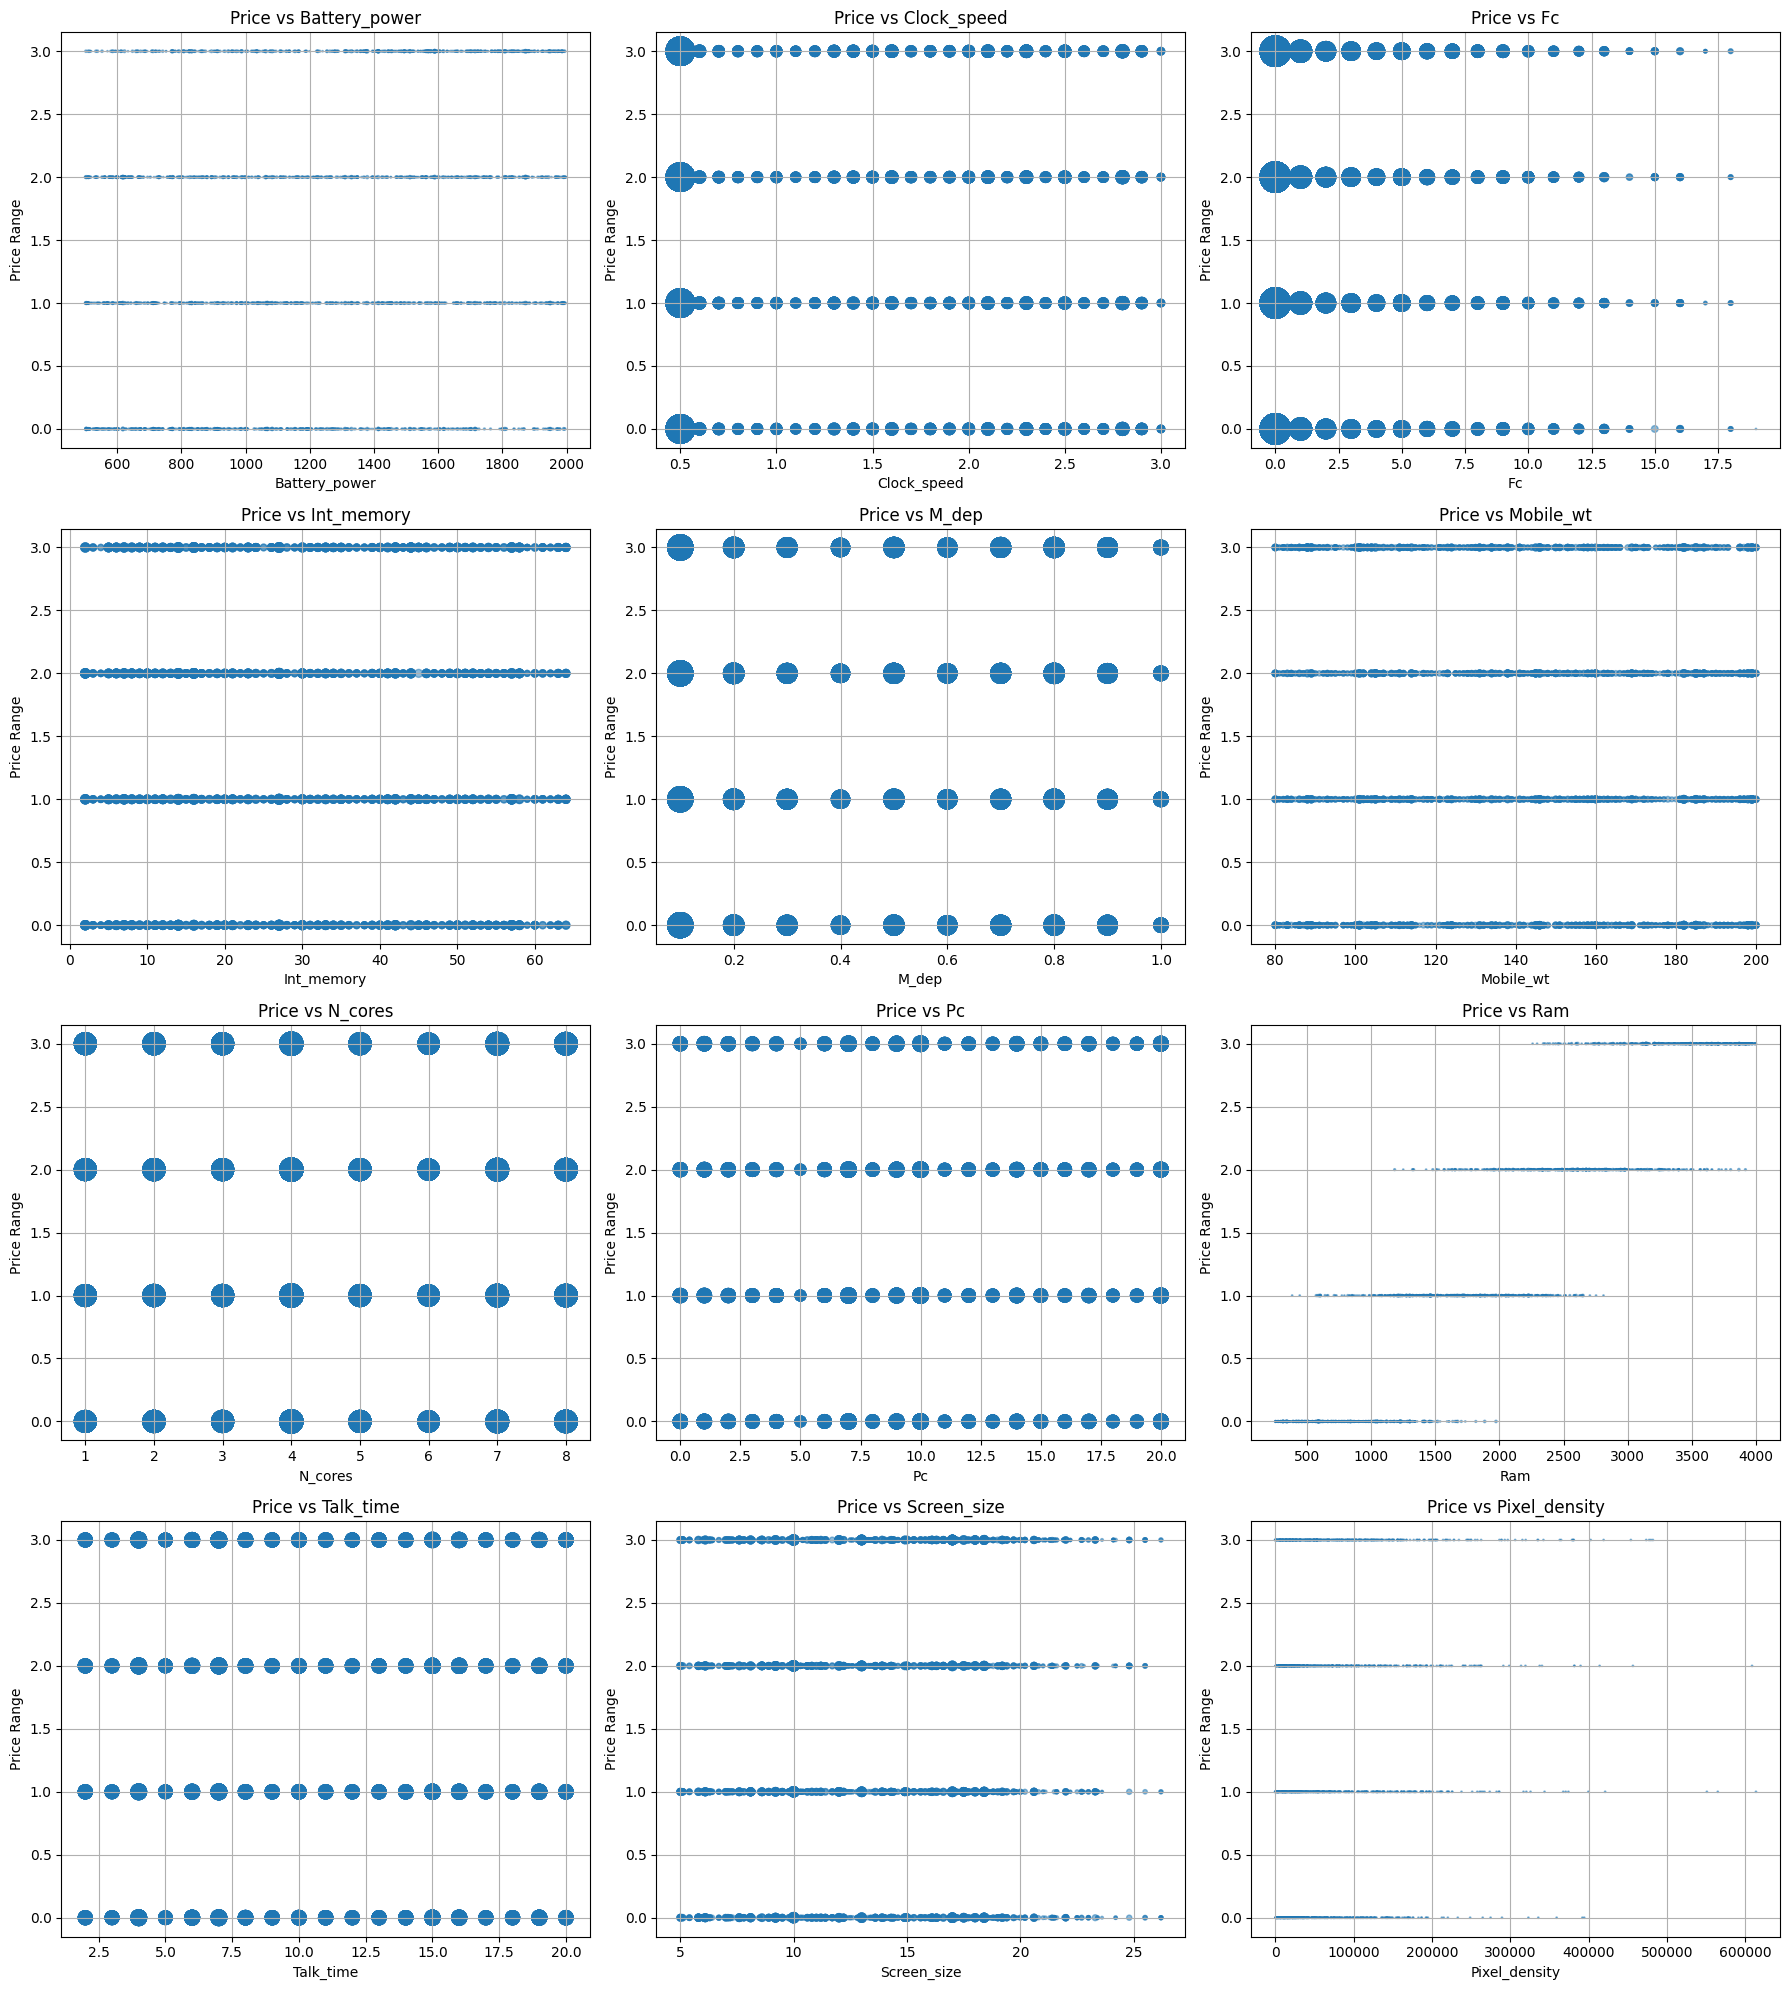

In [58]:
# Features to plot
features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 
            'n_cores', 'pc', 'ram', 'talk_time', 'screen_size', 'pixel_density']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))

# Iterate through each feature
for idx, feature in enumerate(features[:12]):
    # Calculate the count of each value in the feature column
    counts = train[feature].value_counts()
    
    # Scatter plot for price vs feature with point size adjusted by count
    ax = axes[idx // 3, idx % 3]
    ax.scatter(train[feature], train['price_range'], s=counts[train[feature]], alpha=0.5)
    ax.set_title(f'Price vs {feature.capitalize()}')
    ax.set_xlabel(f'{feature.capitalize()}')
    ax.set_ylabel('Price Range')
    ax.grid(True)

# Remove empty subplots if any
if len(features) < 12:
    for i in range(len(features), 12):
        fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.show()


### Ram vs Price Scatter Plot
### It appear that Ram have the most interesting influence
We specifically examine the relationship between RAM and price using a scatter plot.

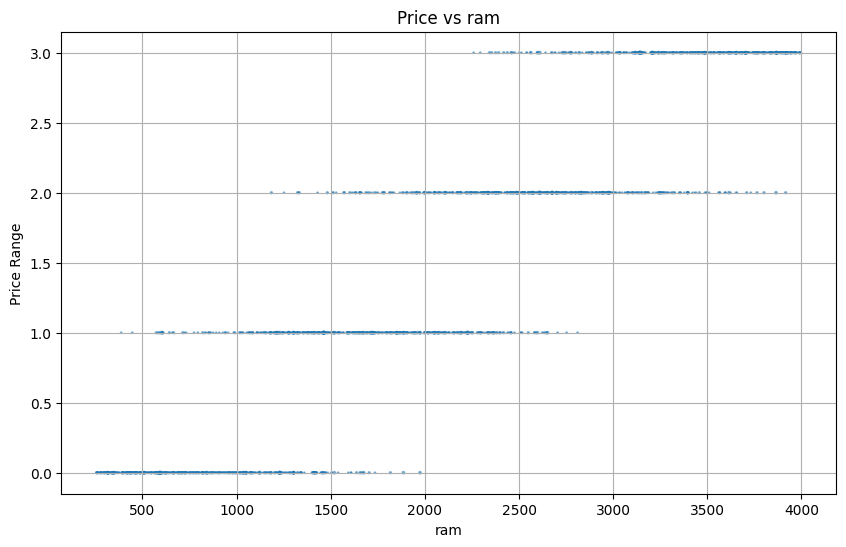

In [59]:
# Calculate the count of each value in the 'm_dep' column
counts = train['ram'].value_counts()

# Scatter plot for price vs m_dep with point size adjusted by count
plt.figure(figsize=(10, 6))
plt.scatter(train['ram'], train['price_range'], s=counts[train['ram']], alpha=0.5)
plt.title('Price vs ram')
plt.xlabel('ram')
plt.ylabel('Price Range')
plt.grid(True)
plt.show()

## 6. Data Export
Finally, the processed train and test datasets are exported to CSV files.

In [60]:
train.to_csv('processed_train_data.csv', index=False)
test.to_csv('processed_test_data.csv', index=False)